# Retrieving Number Information in Nouns & Adjectives using Minimum Intra-class STD + Maximum extra-class average diff
In this Notebook : attempts to isolate Word Embeddings dimension coding for **gender information** (singular/plural) in a sample of Word Embeddings for **NOUNS**, **ADJECTIVES** and **both**.  

## 0. Data Loading

In [33]:
import pandas as pd

# WE loading
all_noun_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv', index_col=0).drop(columns=["gender"])
all_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv', index_col=0).drop(columns = ["gender"])
all_n_a_we = pd.concat([all_noun_we, all_adj_we])

# Normalization: values fall within -1 and 1
for i in range(512):
    for df in [all_noun_we, all_adj_we, all_n_a_we]:
        values, copy = list(df[str(i)]), list(df[str(i)])
        copy.sort()
        min_, max_ = copy[0], copy[len(copy)-1]
        df[str(i)] = [val / (max_ - min_) for val in values]


## 1. Lowest intra-class standard deviation

In [34]:
# for noun
sg_n_we = all_noun_we[all_noun_we["number"] == "singular"][:4638]
pl_n_we = all_noun_we[all_noun_we["number"] == "plural"][:4638]
# the size of singular noun  and plural noun are imbalance: singular noun have 8600 words sand plural noun have 4638 words
# Here we choice 4638 words for both singular and plural noun for balance the data
all_noun_we=pd.concat([sg_n_we, pl_n_we])

#for adj
sg_a_we = all_adj_we[all_adj_we["number"] == "singular"][:2360]
pl_a_we = all_adj_we[all_adj_we["number"] == "plural"][:2360]
# same as Noun, chose 2360 singular noun and plural noun for balance the data
all_adj_we=pd.concat([sg_a_we, pl_a_we])


#for noun and adj
sg_n_a_we=pd.concat([sg_n_we, sg_a_we])
pl_n_a_we=pd.concat([pl_n_we, pl_a_we])

Lowest std for class **singular**:

In [35]:
ls_sg_n = list(sg_n_we.loc[:,:'511'].std().sort_values()[:10].index)
sg_n_we.loc[:,:'511'].std().sort_values()[:10]

287    0.099434
83     0.099995
365    0.101163
314    0.101851
69     0.102729
408    0.102959
25     0.103040
209    0.103204
441    0.103283
422    0.104241
dtype: float64

In [36]:
ls_sg_a = list(sg_a_we.loc[:,:'511'].std().sort_values()[:10].index)
sg_a_we.loc[:,:'511'].std().sort_values()[:10]

441    0.102382
55     0.107316
293    0.107737
314    0.107807
421    0.107879
133    0.108072
312    0.109539
414    0.110045
218    0.110194
357    0.110483
dtype: float64

In [37]:
ls_sg_a_n = list(sg_n_a_we.loc[:,:'511'].std().sort_values()[:10].index)
sg_n_a_we.loc[:,:'511'].std().sort_values()[:10]

441    0.103393
314    0.104172
293    0.107963
422    0.108065
209    0.109007
421    0.109181
218    0.109512
243    0.109796
328    0.110963
507    0.111007
dtype: float64

Lowest std for class **plural**:

In [38]:
ls_pl_n = list(pl_n_we.loc[:,:'511'].std().sort_values()[:10].index)
pl_n_we.loc[:,:'511'].std().sort_values()[:10]

25     0.094950
365    0.099794
209    0.100401
12     0.100881
441    0.101316
338    0.102509
287    0.102830
408    0.103095
83     0.103177
69     0.104031
dtype: float64

In [39]:
ls_pl_a = list(pl_a_we.loc[:,:'511'].std().sort_values()[:10].index)
pl_a_we.loc[:,:'511'].std().sort_values()[:10]

421    0.101945
441    0.103070
321    0.104417
149    0.106865
185    0.108738
127    0.108749
432    0.108815
377    0.109356
314    0.109752
55     0.110300
dtype: float64

In [40]:
ls_pl_a_n = list(pl_n_a_we.loc[:,:'511'].std().sort_values()[:10].index)
pl_n_a_we.loc[:,:'511'].std().sort_values()[:10]

25     0.100935
441    0.102284
321    0.105080
338    0.106737
209    0.106761
127    0.107137
432    0.107453
314    0.107587
12     0.108544
421    0.108586
dtype: float64

Check if these dimensions separate classes plural and singular:

Noun:

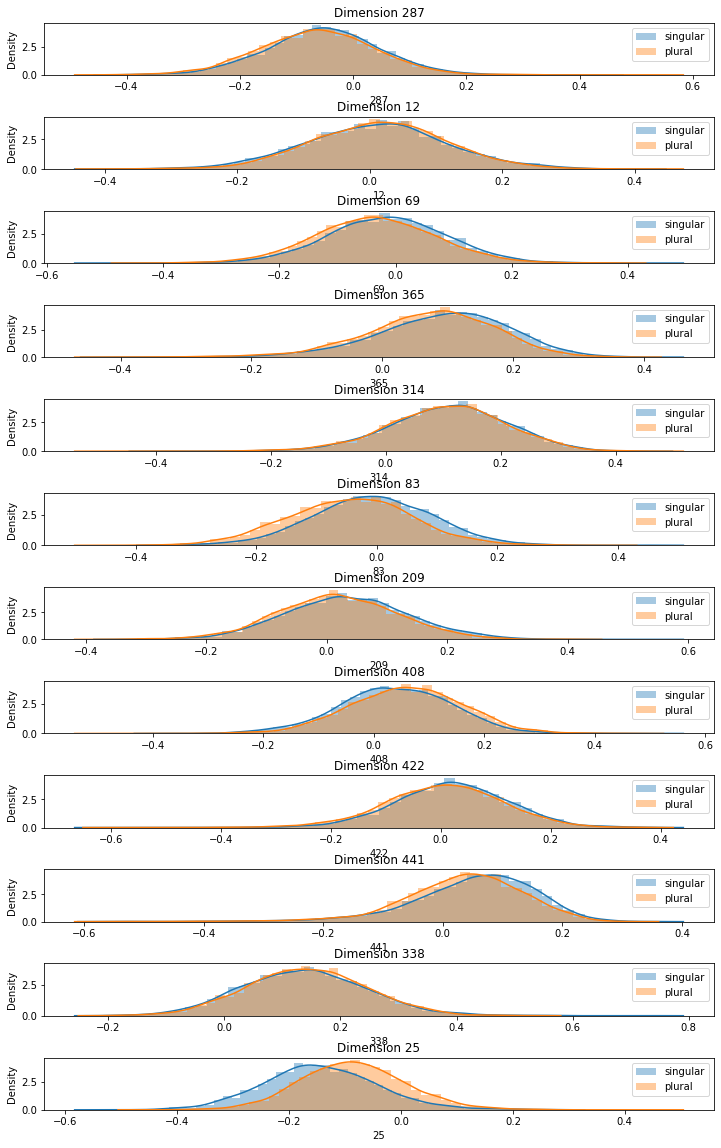

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


n = len(list(set(ls_sg_n + ls_pl_n)))
fig, axs = plt.subplots(n, 1, figsize=(n, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.6)

for i, dim in enumerate(list(set(ls_sg_n + ls_pl_n))):
    sns.distplot(sg_n_we[dim], ax=axs[i], label="singular")
    sns.distplot(pl_n_we[dim], ax=axs[i], label="plural")
    axs[i].legend()
    axs[i].set_title("Dimension " + dim)
plt.show()

ADJ:

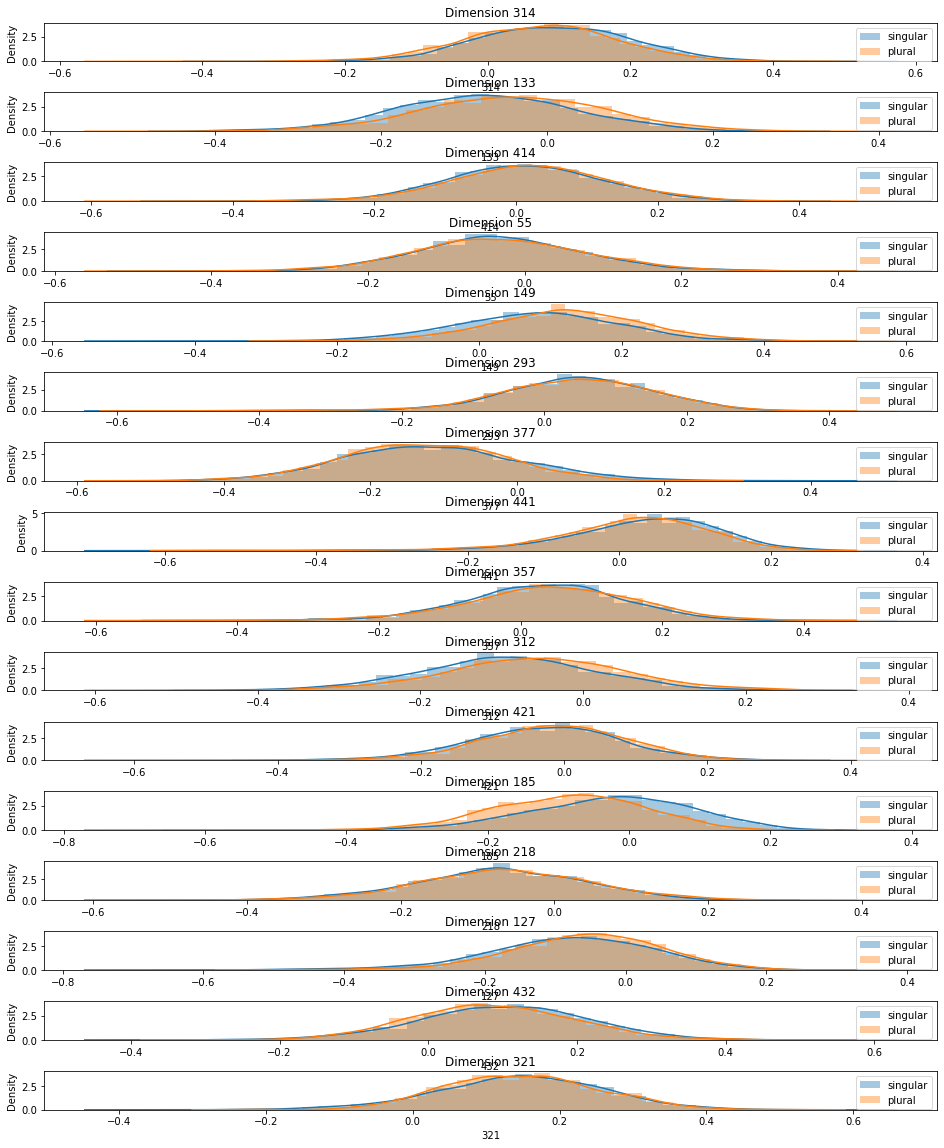

In [42]:
n = len(list(set(ls_sg_a + ls_pl_a)))
fig, axs = plt.subplots(n, 1, figsize=(n, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.6)

for i, dim in enumerate(list(set(ls_sg_a + ls_pl_a))):
    sns.distplot(sg_a_we[dim], ax=axs[i], label="singular")
    sns.distplot(pl_a_we[dim], ax=axs[i], label="plural")
    axs[i].legend()
    axs[i].set_title("Dimension " + dim)
plt.show()

NOUN + ADJ:

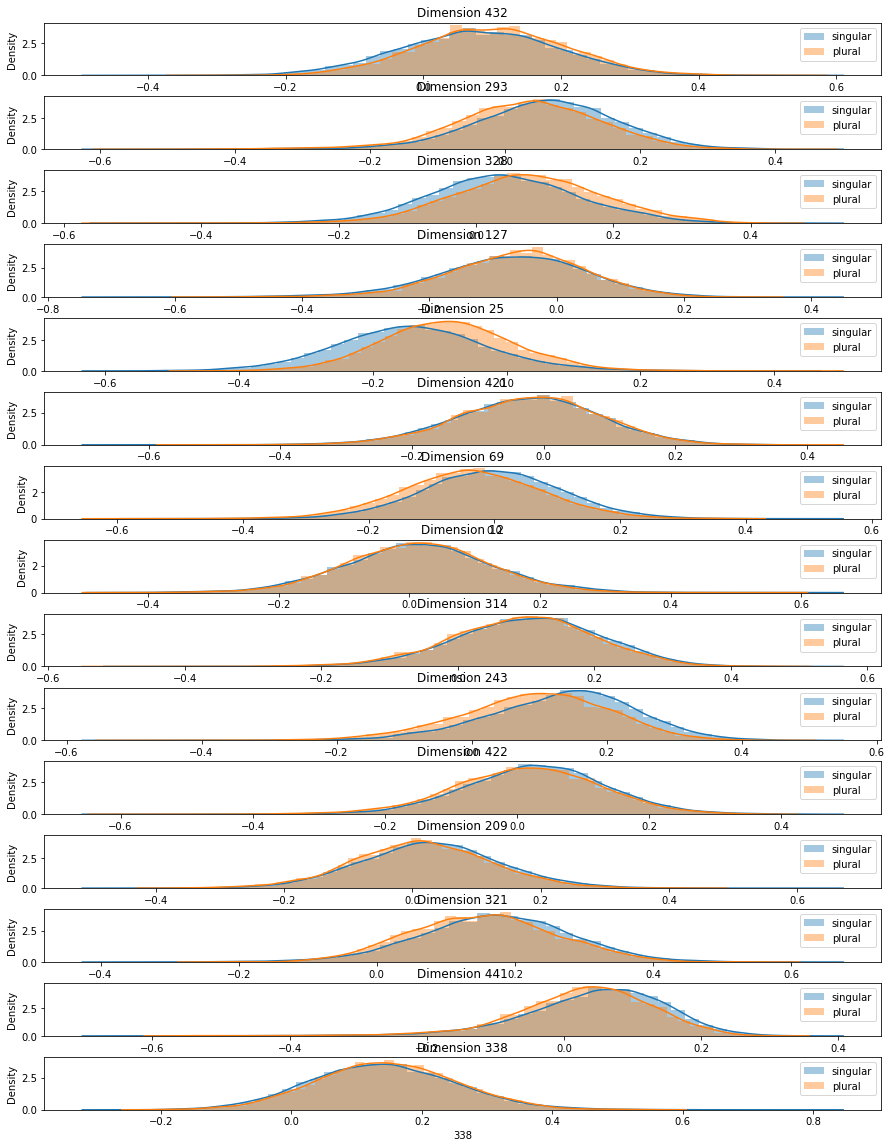

In [43]:
n = len(list(set(ls_sg_a_n + ls_pl_a_n)))
fig, axs = plt.subplots(n, 1, figsize=(n, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, dim in enumerate(list(set(ls_sg_a_n + ls_pl_a_n))):
    sns.distplot(sg_n_a_we[dim], ax=axs[i], label="singular")
    sns.distplot(pl_n_a_we[dim], ax=axs[i], label="plural")
    axs[i].legend()
    axs[i].set_title("Dimension " + dim)
plt.show()

## 2. Dimensions with greatest difference between avg_singular and avg_plural

In [43]:
sg_n_avg = sg_n_we.loc[:,:'511'].mean()
pl_n_avg = pl_n_we.loc[:,:'511'].mean()
d_n_avg = abs(sg_n_avg - pl_n_avg)

sg_a_avg = sg_a_we.loc[:,:'511'].mean()
pl_a_avg = pl_a_we.loc[:,:'511'].mean()
d_a_avg = abs(sg_a_avg - pl_a_avg)

sg_n_a_avg = sg_n_a_we.loc[:,:'511'].mean()
pl_n_a_avg = pl_n_a_we.loc[:,:'511'].mean()
d_n_a_avg = abs(sg_n_a_avg - pl_n_a_avg)

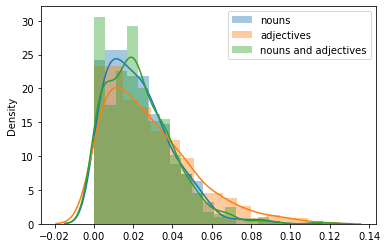

In [44]:
# plot the distribution of differences
sns.distplot(d_n_avg, label="nouns")
sns.distplot(d_a_avg, label="adjectives")
sns.distplot(d_n_a_avg, label="nouns and adjectives")
plt.legend()
plt.show()

In [45]:
# top 10 dimensions with the highest difference
d_n_avg.sort_values(ascending=False)[:10]

310    0.116710
288    0.091012
81     0.086009
54     0.083567
250    0.083500
285    0.077125
172    0.074420
278    0.072095
507    0.071131
359    0.066485
dtype: float64

In [46]:
d_a_avg.sort_values(ascending=False)[:10]

310    0.116402
54     0.107396
192    0.103877
274    0.102449
84     0.098927
56     0.094790
384    0.094782
474    0.091187
5      0.091061
285    0.090398
dtype: float64

In [47]:
d_n_a_avg.sort_values(ascending=False)[:10]

310    0.116606
54     0.091603
288    0.086665
81     0.082213
285    0.081601
384    0.071953
278    0.070465
172    0.069167
495    0.067599
311    0.067445
dtype: float64